In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('FIFA 2018 Statistics.csv')

In [3]:
dados.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [4]:
dados.columns

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')

In [5]:
dados.iloc[0]

Date                        14-06-2018
Team                            Russia
Opponent                  Saudi Arabia
Goal Scored                          5
Ball Possession %                   40
Attempts                            13
On-Target                            7
Off-Target                           3
Blocked                              3
Corners                              6
Offsides                             3
Free Kicks                          11
Saves                                0
Pass Accuracy %                     78
Passes                             306
Distance Covered (Kms)             118
Fouls Committed                     22
Yellow Card                          0
Yellow & Red                         0
Red                                  0
Man of the Match                   Yes
1st Goal                            12
Round                      Group Stage
PSO                                 No
Goals in PSO                         0
Own goals                

In [6]:
dados.iloc[1]

Date                        14-06-2018
Team                      Saudi Arabia
Opponent                        Russia
Goal Scored                          0
Ball Possession %                   60
Attempts                             6
On-Target                            0
Off-Target                           3
Blocked                              3
Corners                              2
Offsides                             1
Free Kicks                          25
Saves                                2
Pass Accuracy %                     86
Passes                             511
Distance Covered (Kms)             105
Fouls Committed                     10
Yellow Card                          0
Yellow & Red                         0
Red                                  0
Man of the Match                    No
1st Goal                           NaN
Round                      Group Stage
PSO                                 No
Goals in PSO                         0
Own goals                

In [7]:
dados.groupby('Team')['Goal Scored'].sum()

Team
Argentina          6
Australia          2
Belgium           16
Brazil             8
Colombia           6
Costa Rica         2
Croatia           14
Denmark            3
Egypt              2
England           12
France            14
Germany            2
Iceland            2
Iran               2
Japan              6
Korea Republic     3
Mexico             3
Morocco            2
Nigeria            3
Panama             2
Peru               2
Poland             2
Portugal           6
Russia            11
Saudi Arabia       2
Senegal            4
Serbia             2
Spain              7
Sweden             6
Switzerland        5
Tunisia            5
Uruguay            7
Name: Goal Scored, dtype: int64

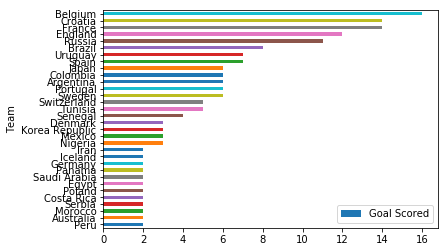

In [8]:
dados.groupby('Team')['Goal Scored'].sum()\
    .reset_index().sort_values('Goal Scored')\
    .plot.barh('Team', 'Goal Scored')

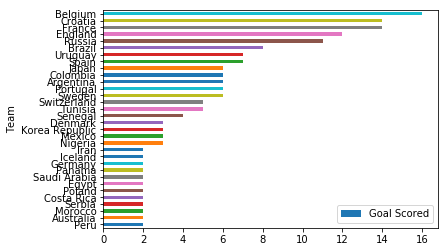

In [14]:
plot = dados.groupby('Team')['Goal Scored'].sum()\
    .reset_index().sort_values('Goal Scored')\
    .plot.barh('Team', 'Goal Scored')
fig = plot.get_figure()
fig.savefig('barh.png')